In [3]:
# AI from ML Algortihm
# 0. punya data dan tau ingin untuk apa?
# 1. kita buat inisiasi mesin cerdas (model) [masih bodoh]
# 2. training model tersebut dengan data
# 3. model cerdas
# 4. evaluasi model (degree of intellegent)

# Kategori utama ML yang umum
# 1. Unsuppervised learning
#         - clustering (1)
# 2. Suppervised learing
#         - classification (2)
#         - regression (3)
# 3. Reinforce learing
# 4. dst

In [4]:
#          data                     target
# ['merah',  'besar',  '10kg']      'apel'
# ['kuning', 'kecil',  '20kg']      'jeruk'
# ['hijau',  'sedang', '12kg']      'pisang'
# ['merah',  'kecil',  '1kg']       'jeruk'
# ['ungu',   'besar',  '0.4kg']     'apel'

In [5]:
# K-means: algoritma untuk membuat AI dengan spesifik kecerdasan
# mengelompokan data

# 1. Tentukan jumlah cluster
# 2. Generate initial cluster misalnya secara random
# 3. Labeli data yang ada masuk ke kluster yang mana?
# 4. Membuat custer center baru berdasarkan anggotanya agar 
#    lebih mempresentasikan cluster, misalnya pilih value meannya.
# 5. Ulaing 3 dan 4 samapi tidak ada perbedaan yang mencolok
#    (convergen)


In [6]:
import random
import matplotlib.pyplot as plt
import pandas as pd
random.seed(0)


def create_dummy_df(plot=True):
    x = []
    y = []
    for i in range(30):
        x.append(random.uniform(0, 30))
        y.append(random.uniform(0, 30))
        
        x.append(random.uniform(40, 60))
        y.append(random.uniform(0, 30))
        
        x.append(random.uniform(20, 60))
        y.append(random.uniform(40, 70))
    df = pd.DataFrame({'a': x, 'b': y})
#     print("befor reset index", df)
#     print(df.columns)
    df = df.reset_index()
#     print(df)
#     print(df.columns)
    if plot:
        plt.scatter(df['a'], df['b'])
    return df

df = create_dummy_df()

In [7]:
df

,index,a,b
0,0,25.332656,22.738632
1,1,48.411432,7.767503
2,2,40.450989,52.148024
3,3,23.513958,9.099382
4,4,49.531939,17.501461
...,...,...,...
85,85,54.831488,10.077497
86,86,21.827860,48.426495
87,87,7.203912,28.593880
88,88,47.044511,8.636337


In [8]:
# Step 1: Jumlah cluster
k = 3

# Step 2: Create initial cluster randomly 
#         and bounded to min and max value
def create_initial_random_centroid(df, k, plot=True):
    c_a = []
    c_b = []
    for i in range(k):
        c_a.append(random.uniform(min(df['a']), max(df['a'])))
        c_b.append(random.uniform(min(df['b']), max(df['b'])))
    centr = {
        'a': c_a,
        'b': c_b
    }
    if plot:
        plt.scatter(df['a'], df['b'])
        plt.scatter(centr['a'], centr['b'])
    return centr

centr = create_initial_random_centroid(df, k)

In [9]:
centr

{'a': [38.18033270215556, 43.02441022538036, 25.203278543927095],
 'b': [43.39754516647952, 27.252581903269622, 45.458862418991394]}

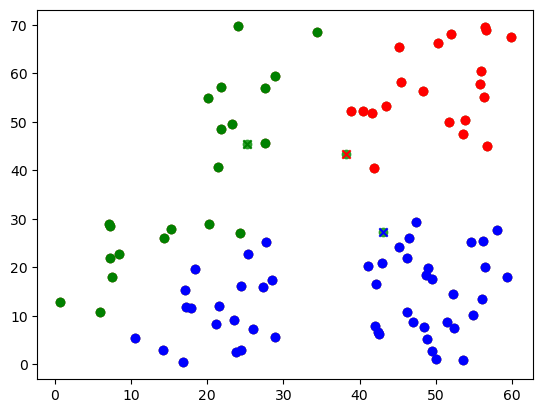

In [10]:
# Step3: Labeli data masuk kluster mana?

import numpy as np

def labelator(x, centr):
    dist = []
    for i in range(len(centr['a'])):
        dist.append(
            np.sqrt((centr['a'][i] - x['a']
                     )**2 + (centr['b'][i] - x['b']
                             )**2))
    
    c = np.argmin(dist)
    if c == 0:
        c = 'red'
    elif c == 1:
        c = 'blue'
    else:
        c = 'green'
    return c



def plt_with_cluster(df, centr):
    plt.scatter(df[df['cluster'] == 'red']['a'], df[df['cluster'] == 'red']['b'], color='r')
    plt.scatter(df[df['cluster'] == 'blue']['a'], df[df['cluster'] == 'blue']['b'], color='b')
    plt.scatter(df[df['cluster'] == 'green']['a'], df[df['cluster'] == 'green']['b'], color='g')
                    
    plt.scatter([centr['a'][0]], [centr['b'][0]], marker='x', color='r')
    plt.scatter([centr['a'][1]], [centr['b'][1]], marker='x', color='b')
    plt.scatter([centr['a'][2]], [centr['b'][2]], marker='x', color='g')
    
    plt.show()
    return


def labeli_data(df, centr, plot=True):
    cols = list(df.columns)
    df['cluster'] = df.apply(labelator, args=[centr], axis=1)
    
    if plot:
        plt_with_cluster(df, centr)
    return df

df = labeli_data(df, centr)

                    
        

In [11]:
# Step 4: Membuat cluster baru yang lebih represntatif
def get_new_centroid(df):
    c_a_ = []
    c_b_ = []
    c = ['red', 'blue', 'green']
    for i in range(len(c)):
        df_c = df[df['cluster'] == c[i]]
        c_a_.append(np.mean(df_c['a']))
        c_b_.append(np.mean(df_c['b']))
    return {'a': c_a_, 'b': c_b_}
new_centr = get_new_centroid(df)
new_centr

{'a': [50.21406338572126, 38.69023498161644, 17.578117451339867],
 'b': [56.82666060736202, 13.385861971832947, 38.307779479601194]}

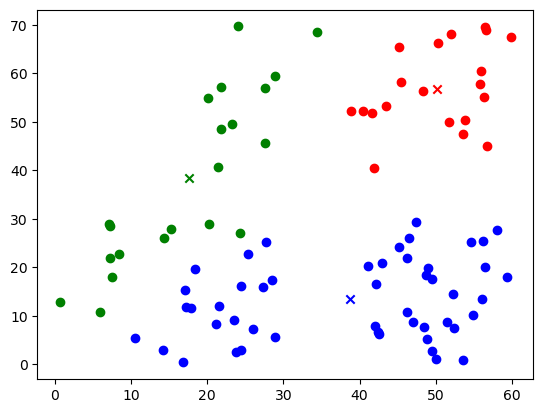

In [12]:
plt_with_cluster(df, new_centr)

In [ ]:
# Step 5: ulangi 3 dan 4
df = create_dummy_df()
k = 3

print("Pada iterasi ke:", 1, "=================")
centr_i = create_initial_random_centroid(df, k, plot=False)
df = labeli_data(df, centr_i)
plt_with_cluster(df, centr_i)

iterasi = 1
while iterasi < 20:
    iterasi = iterasi + 1
    print("Pada iterasi ke:", iterasi, "=================")
    centr_i2 = centr_i
    df = labeli_data(df, centr_i)
    
    centr_i = get_new_centroid(df)
    plt_with_cluster(df, centr_i)
    
    
    


In [13]:
# Stop when convergen
def cekker(a, b):
    diff = 1000
    for i in range(len(a)):
        x = abs(a[i] - b[i])
        if x < diff:
            diff = x
    print("diff: ", diff)
    if diff < 0.001:
        return True
    else:
        return False

Pada iterasi ke: 1 =================


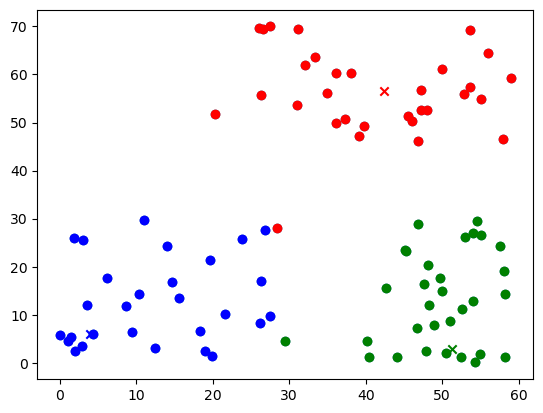

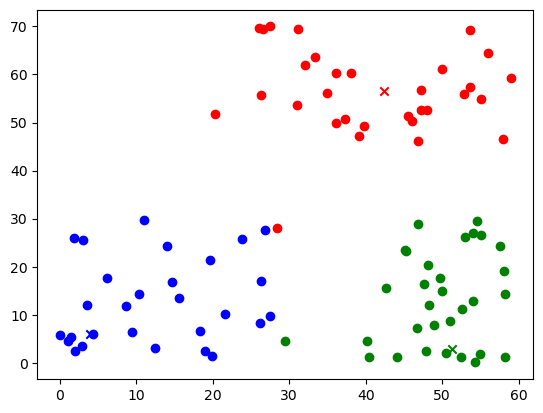

Pada iterasi ke: 2 =================


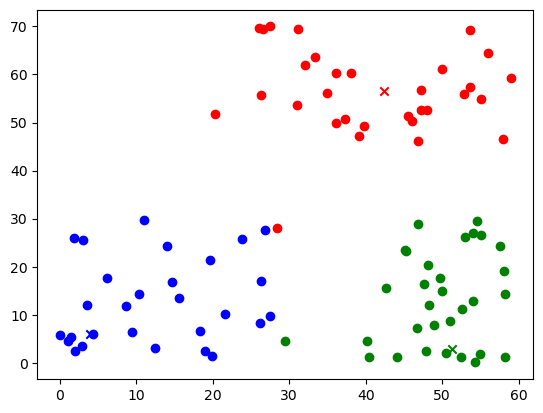

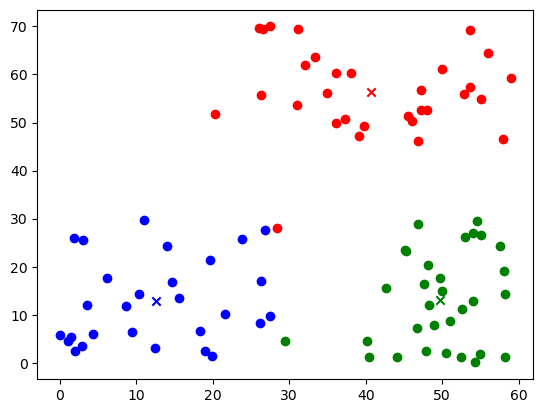

diff:  1.5932027079437532
Pada iterasi ke: 3 =================


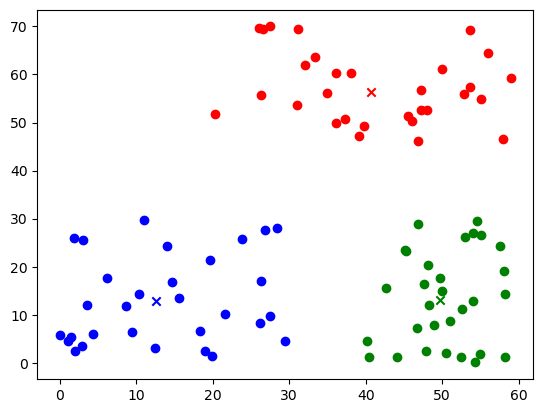

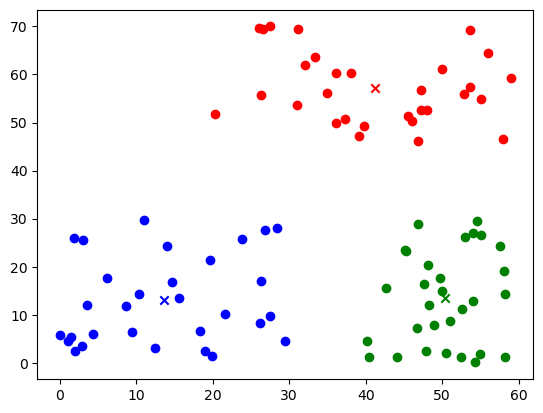

diff:  0.41161135206903765
Pada iterasi ke: 4 =================


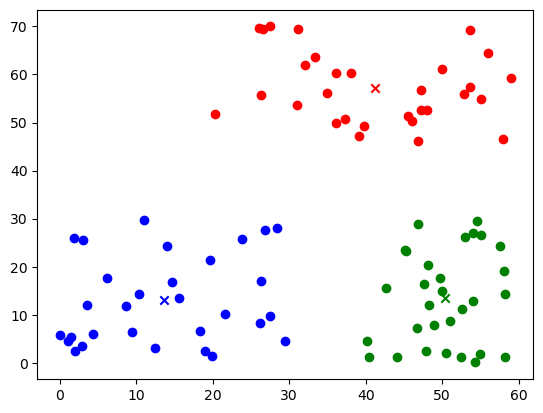

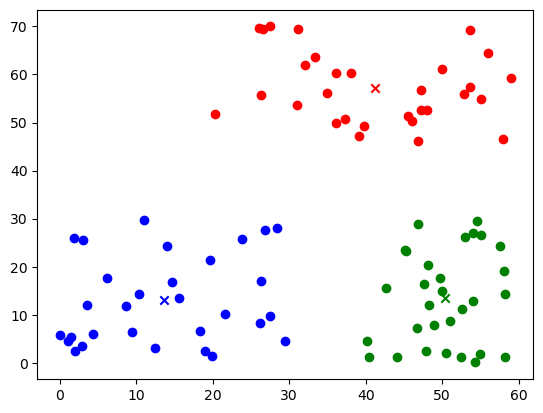

diff:  0.0
YeY, convergen pada iterasi ke:  4


In [14]:
# Step 5: ulangi 3 dan 4
df = create_dummy_df()
k = 3

print("Pada iterasi ke:", 1, "=================")
centr_i = create_initial_random_centroid(df, k, plot=False)
df = labeli_data(df, centr_i)
plt_with_cluster(df, centr_i)

iterasi = 1
convergence = False
while not convergence:
    iterasi = iterasi + 1
    print("Pada iterasi ke:", iterasi, "=================")
    centr_i2 = centr_i
    df = labeli_data(df, centr_i)
    
    centr_i = get_new_centroid(df)
    plt_with_cluster(df, centr_i)
    
    if cekker(centr_i['a'], centr_i2['a']) or (iterasi == 20):
        print("YeY, convergen pada iterasi ke: ", iterasi)
        break
    


In [15]:
# AI from ML Algortihm
# 0. punya data dan tau ingin untuk apa?
# 1. kita buat inisiasi mesin cerdas (model) [masih bodoh] : centr_i
# 2. training model tersebut dengan data
# 3. otupt: model cerdas
# 4. evaluasi model (degree of intellegent)
# 5. model cerdas ini kita bisa gunakan untuk mengkluster data baru

# Kategori utama ML yang umum
# 1. Unsuppervised learning
#         - clustering (1)
# 2. Suppervised learing
#         - classification (2)
#         - regression (3)
# 3. Reinforce learing
# 4. dst

In [16]:
# AI model kameans: centr_i (last)
centr_i

{'a': [41.155028539240185, 13.65107311915703, 50.33476353233324],
 'b': [57.26390148088617, 13.055205140967361, 13.457617711952857]}

In [17]:
df.head()

,index,a,b,cluster
0,0,0.045727,5.769286,blue
1,1,46.688034,7.182479,green
2,2,45.495976,51.359442,red
3,3,26.262702,17.044543,blue
4,4,48.288128,12.068012,green


In [18]:
new_df = create_dummy_df()
new_df.head()

,index,a,b
0,0,6.752720,1.218961
1,1,40.305703,25.318641
2,2,33.223775,44.820702
3,3,4.464585,19.682510
4,4,59.371965,15.149991


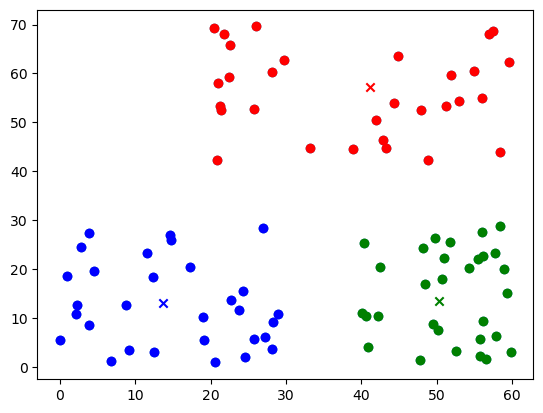

,index,a,b,cluster
0,0,6.752720,1.218961,blue
1,1,40.305703,25.318641,green
2,2,33.223775,44.820702,red
3,3,4.464585,19.682510,blue
4,4,59.371965,15.149991,green


In [19]:
def predict(df, model):
    df = labeli_data(df, model)
    return df

new_df = predict(new_df, centr_i)
new_df.head()

In [20]:
# Performance dari model yang tadi dibuat
df['cluster_int'] = [0 if x == 'red' else 1 if x == 'blue' else 2 for x in list(df['cluster'])]
df.head()

,index,a,b,cluster,cluster_int
0,0,0.045727,5.769286,blue,1
1,1,46.688034,7.182479,green,2
2,2,45.495976,51.359442,red,0
3,3,26.262702,17.044543,blue,1
4,4,48.288128,12.068012,green,2


In [21]:
# Silhouette [-1, 1]
# if 1, cluster is dense and well-sparated
# if 0, ada kluster yang overlaping
# if -1 ada data yang salah di labeli

from sklearn.metrics import silhouette_score
score = silhouette_score(df[['a', 'b']], df['cluster_int'], 
                        metric='euclidean')

In [22]:
score

0.5920209093080064

In [23]:
# Pakai packege
from sklearn import datasets
from sklearn.cluster import KMeans

# load data
iris = datasets.load_iris()
x = iris.data

# inisiasi model
km = KMeans(n_clusters=3, random_state=42)

# training
km.fit_predict(x)

# score
score = silhouette_score(x, km.labels_, 
                        metric='euclidean')
print("skor:", score)

skor: 0.5528190123564091


In [24]:
km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [25]:
# Pakai packege
from sklearn import datasets
from sklearn.cluster import KMeans

# load data
iris = datasets.load_iris()
x_kita = df[['a', 'b']].to_numpy()

# inisiasi model
km = KMeans(n_clusters=3, random_state=42)

# training
km.fit_predict(x_kita)

# score
score = silhouette_score(x_kita, km.labels_, 
                        metric='euclidean')
print("skor:", score)

skor: 0.5920209093080064


In [ ]:
from sklearn import cluster

dir(cluster)

In [27]:
from yellowbrick.cluster import SilhouetteVisualizer

In [38]:
divmod(7, 2)

(3, 1)

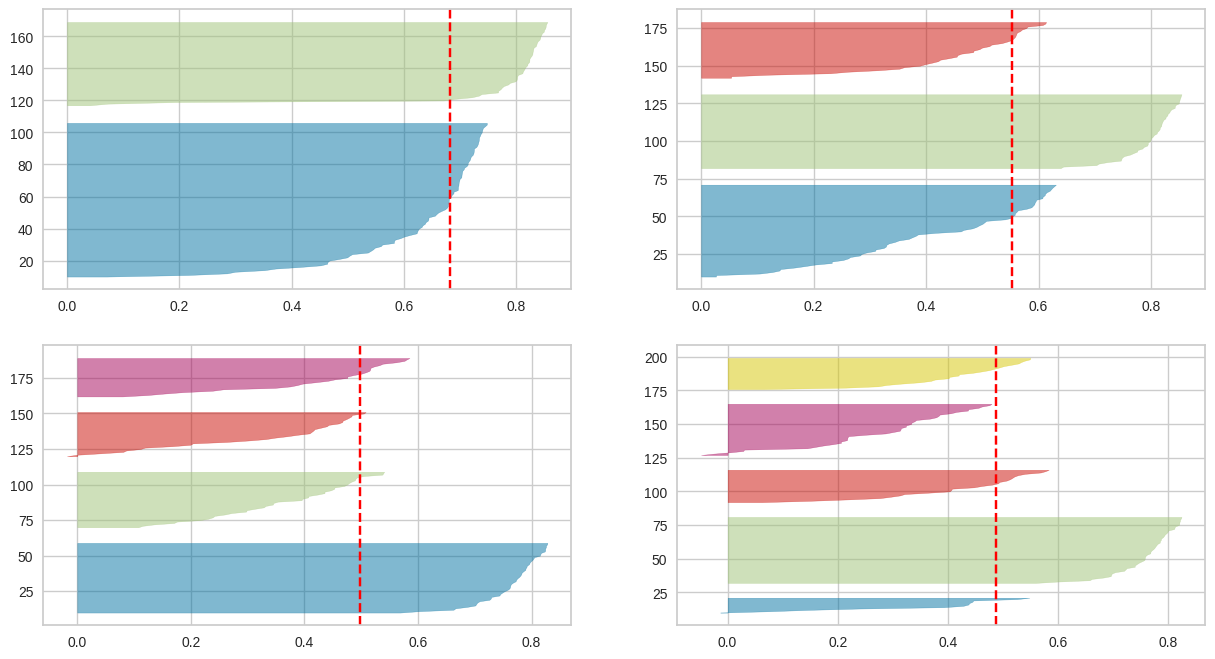

In [31]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))
for i in [2, 3, 4, 5]:
    km = KMeans(
        n_clusters=i,
        init='k-means++',
        n_init=10,
        max_iter=100,
        random_state=42
        )
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km,
                                     colors='yellowbrick',
                                     ax=ax[q-1][mod])
    visualizer.fit(x)
    
plt.show()

In [ ]:
dir(visualizer)

In [60]:
visualizer.__doc__

"\n    The Silhouette Visualizer displays the silhouette coefficient for each\n    sample on a per-cluster basis, visually evaluating the density and\n    separation between clusters. The score is calculated by averaging the\n    silhouette coefficient for each sample, computed as the difference\n    between the average intra-cluster distance and the mean nearest-cluster\n    distance for each sample, normalized by the maximum value. This produces a\n    score between -1 and +1, where scores near +1 indicate high separation\n    and scores near -1 indicate that the samples may have been assigned to\n    the wrong cluster.\n\n    In SilhouetteVisualizer plots, clusters with higher scores have wider\n    silhouettes, but clusters that are less cohesive will fall short of the\n    average score across all clusters, which is plotted as a vertical dotted\n    red line.\n\n    This is particularly useful for determining cluster imbalance, or for\n    selecting a value for K by comparing mult